In [98]:
import numpy as np
import pandas as pd

import datetime
from datetime import datetime, date

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 80)

import matplotlib.pyplot as plt
%matplotlib inline

In [99]:
from chardet.universaldetector import UniversalDetector

# Create a detector object
detector = UniversalDetector()

# Open the file and feed its content to the detector
with open('credit_train.csv', 'rb') as file:
    for line in file:
        detector.feed(line)
        if detector.done:
            break

# Close the detector to finalize the result
detector.close()

# Get the detected encoding
detected_encoding = detector.result['encoding']

# Print the detected encoding
print(f"The detected encoding is: {detected_encoding}")


The detected encoding is: KOI8-R


In [100]:
credit_train = pd.read_csv('credit_train.csv', sep = ";",encoding = detected_encoding)

In [101]:
credit_train.head()

   client_id gender   age marital_status  ... monthly_income credit_count  \
0          1      M   NaN            NaN  ...        30000.0          1.0   
1          2      F   NaN            MAR  ...            NaN          2.0   
2          3      M  32.0            MAR  ...            NaN          5.0   
3          4      F  27.0            NaN  ...            NaN          2.0   
4          5      M  45.0            NaN  ...            NaN          1.0   

   overdue_credit_count  open_account_flg  
0                   1.0                 0  
1                   0.0                 0  
2                   0.0                 0  
3                   0.0                 0  
4                   0.0                 0  

[5 rows x 15 columns]

In [102]:
credit_train.columns

Index(['client_id', 'gender', 'age', 'marital_status', 'job_position',
       'credit_sum', 'credit_month', 'tariff_id', 'score_shk', 'education',
       'living_region', 'monthly_income', 'credit_count',
       'overdue_credit_count', 'open_account_flg'],
      dtype='object')

In [103]:
credit_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_id             170746 non-null  int64  
 1   gender                170746 non-null  object 
 2   age                   170743 non-null  float64
 3   marital_status        170743 non-null  object 
 4   job_position          170746 non-null  object 
 5   credit_sum            170744 non-null  object 
 6   credit_month          170746 non-null  int64  
 7   tariff_id             170746 non-null  float64
 8   score_shk             170739 non-null  object 
 9   education             170741 non-null  object 
 10  living_region         170554 non-null  object 
 11  monthly_income        170741 non-null  float64
 12  credit_count          161516 non-null  float64
 13  overdue_credit_count  161516 non-null  float64
 14  open_account_flg      170746 non-null  int64  
dtype

In [104]:
# columns contain float values that instead of '.' have ','
credit_train['credit_sum'] = credit_train['credit_sum'].str.replace(',', '.')
credit_train['credit_sum'] = credit_train['credit_sum'].astype(float)
credit_train['score_shk'] = credit_train['score_shk'].str.replace(',', '.')
credit_train['score_shk'] = credit_train['score_shk'].astype(float)

In [105]:
credit_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_id             170746 non-null  int64  
 1   gender                170746 non-null  object 
 2   age                   170743 non-null  float64
 3   marital_status        170743 non-null  object 
 4   job_position          170746 non-null  object 
 5   credit_sum            170744 non-null  float64
 6   credit_month          170746 non-null  int64  
 7   tariff_id             170746 non-null  float64
 8   score_shk             170739 non-null  float64
 9   education             170741 non-null  object 
 10  living_region         170554 non-null  object 
 11  monthly_income        170741 non-null  float64
 12  credit_count          161516 non-null  float64
 13  overdue_credit_count  161516 non-null  float64
 14  open_account_flg      170746 non-null  int64  
dtype

In [106]:
# leave only columns with numerical data
credit_train = credit_train.drop(['client_id','gender', 'marital_status', 'job_position', 'education','living_region'], axis=1)

In [107]:
credit_train.describe()

                 age     credit_sum   credit_month      tariff_id  ...  \
count  170743.000000  170744.000000  170746.000000  170746.000000  ...   
mean       36.497262   26095.097541      10.980749       1.323900  ...   
std        10.546044   16234.874095       3.536698       0.235813  ...   
min        18.000000    2736.000000       3.000000       1.000000  ...   
25%        28.000000   14908.000000      10.000000       1.100000  ...   
50%        34.000000   21229.000000      10.000000       1.320000  ...   
75%        43.000000   32068.000000      12.000000       1.600000  ...   
max        71.000000  200000.000000      36.000000       1.960000  ...   

       monthly_income   credit_count  overdue_credit_count  open_account_flg  
count   170741.000000  161516.000000         161516.000000     170746.000000  
mean     40138.596149       2.107308              0.046070          0.176028  
std      25044.373992       1.777128              0.211548          0.380845  
min       5000.00

In [108]:
#finding missing values
missing_values = credit_train.isnull().sum()
print(missing_values)

age                        3
credit_sum                 2
credit_month               0
tariff_id                  0
score_shk                  7
monthly_income             5
credit_count            9230
overdue_credit_count    9230
open_account_flg           0
dtype: int64


In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(credit_train, test_size=0.2, random_state=42)

In [110]:
#removing missing values
X_train = X_train.dropna()
X_test = X_test.dropna()

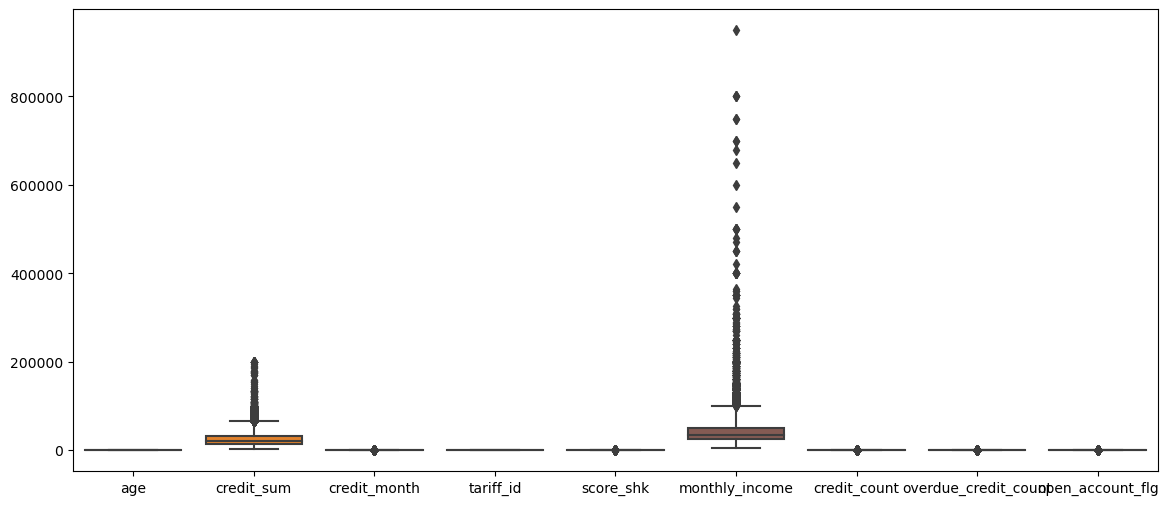

In [111]:
import seaborn as sns
plt.figure(figsize=(14, 6))
sns.boxplot(data=X_train, whis=2, dodge=True)
plt.show()

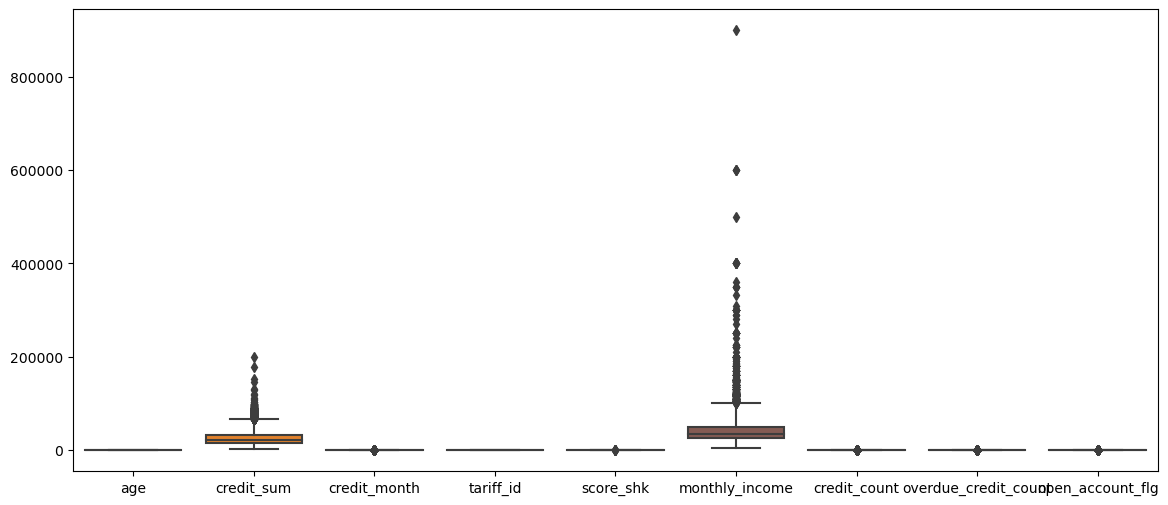

In [112]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=X_test, whis=2, dodge=True)
plt.show()

In [115]:
def find_outliers(column):
    mean_value = column.mean()
    std_value = column.std()
    return column[(column - mean_value).abs() > 2.5 * std_value]

outliers_dict_x_test = {}

for column_name, column_data in X_test.items():
    outliers_dict_x_test[column_name] = find_outliers(column_data)

for column_name, outliers in outliers_dict_x_test.items():
    print(f"Outliers in {column_name}:\n{outliers}")

Outliers in age:
136395    69.0
77419     64.0
19356     68.0
125766    66.0
126149    66.0
          ... 
117397    67.0
114371    65.0
1810      69.0
91538     66.0
77691     65.0
Name: age, Length: 481, dtype: float64
Outliers in credit_sum:
73812     80990.0
144614    67989.0
18828     73479.0
30608     67659.0
132327    69668.0
           ...   
139383    77980.0
29503     83170.0
90149     75768.0
905       74288.0
116448    70068.0
Name: credit_sum, Length: 1021, dtype: float64
Outliers in credit_month:
809       24
34387     24
139038    24
41301     24
47884     24
          ..
91538     24
44095     24
36583     24
64542     24
116448    24
Name: credit_month, Length: 1333, dtype: int64
Outliers in tariff_id:
123134    1.91
154828    1.91
3565      1.94
105274    1.91
47146     1.91
          ... 
69808     1.91
41074     1.91
107872    1.91
11212     1.94
5959      1.91
Name: tariff_id, Length: 130, dtype: float64
Outliers in score_shk:
77951     0.775243
88230     0.788243


In [116]:
outliers_dict_x_train = {}

for column_name, column_data in X_train.items():
    outliers_dict_x_train[column_name] = find_outliers(column_data)

for column_name, outliers in outliers_dict_x_train.items():
    print(f"Outliers in {column_name}:\n{outliers}")

Outliers in age:
138752    65.0
56924     65.0
37538     65.0
19574     65.0
95579     69.0
          ... 
27663     64.0
56250     65.0
93384     69.0
2693      64.0
134633    64.0
Name: age, Length: 1837, dtype: float64
Outliers in credit_sum:
117625    68989.0
36962     73665.0
31676     68989.0
124996    76168.0
92957     67989.0
           ...   
73530     87030.0
119101    68989.0
55016     68470.0
18047     71980.0
12185     67169.0
Name: credit_sum, Length: 3886, dtype: float64
Outliers in credit_month:
117047    24
71953     24
84401     24
2212      24
85542     24
          ..
154555    24
2747      24
103355    24
64925     24
110268    24
Name: credit_month, Length: 5149, dtype: int64
Outliers in tariff_id:
2315      1.94
166274    1.94
114116    1.94
8046      1.94
70571     1.94
          ... 
74813     1.94
46542     1.94
133789    1.94
125827    1.94
10965     1.94
Name: tariff_id, Length: 340, dtype: float64
Outliers in score_shk:
111863    0.892819
155096    0.792143

In [96]:
corr = credit_train.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,credit_sum,credit_month,tariff_id,score_shk,monthly_income,credit_count,overdue_credit_count,open_account_flg
age,1.000000,-0.096612,0.007097,-0.109297,-0.166311,-0.014885,0.116663,0.007788,-0.031064
credit_sum,-0.096612,1.000000,0.228322,0.090672,0.054422,0.351488,0.015810,-0.003768,-0.072040
credit_month,0.007097,0.228322,1.000000,-0.056393,0.040373,0.007659,0.050428,0.006471,0.025809
tariff_id,-0.109297,0.090672,-0.056393,1.000000,0.398268,0.012996,-0.053724,0.086799,-0.067346
score_shk,-0.166311,0.054422,0.040373,0.398268,1.000000,-0.107255,-0.093975,0.170518,0.048685
monthly_income,-0.014885,0.351488,0.007659,0.012996,-0.107255,1.000000,0.146483,0.033698,-0.023700
credit_count,0.116663,0.015810,0.050428,-0.053724,-0.093975,0.146483,1.000000,0.177294,0.036017
overdue_credit_count,0.007788,-0.003768,0.006471,0.086799,0.170518,0.033698,0.177294,1.000000,0.023451
open_account_flg,-0.031064,-0.072040,0.025809,-0.067346,0.048685,-0.023700,0.036017,0.023451,1.000000


In [129]:
from scipy.stats import shapiro
for column_name, column_data in X_train.items():
    stat, p_value = shapiro(column_data)
    print(f'Shapiro-Wilk test for {column_name}: Statistic={stat}, p-value={p_value}')

Shapiro-Wilk test for age: Statistic=0.9488304257392883, p-value=0.0
Shapiro-Wilk test for credit_sum: Statistic=0.8727838397026062, p-value=0.0
Shapiro-Wilk test for credit_month: Statistic=0.6433426141738892, p-value=0.0
Shapiro-Wilk test for tariff_id: Statistic=0.8415687084197998, p-value=0.0
Shapiro-Wilk test for score_shk: Statistic=0.9943649172782898, p-value=0.0
Shapiro-Wilk test for monthly_income: Statistic=0.729705810546875, p-value=0.0
Shapiro-Wilk test for credit_count: Statistic=0.8777674436569214, p-value=0.0
Shapiro-Wilk test for overdue_credit_count: Statistic=0.2115797996520996, p-value=0.0
Shapiro-Wilk test for open_account_flg: Statistic=0.44727128744125366, p-value=0.0


/Users/margarita/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


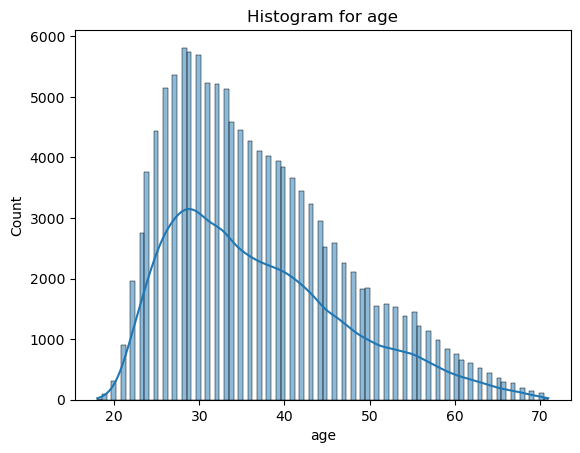

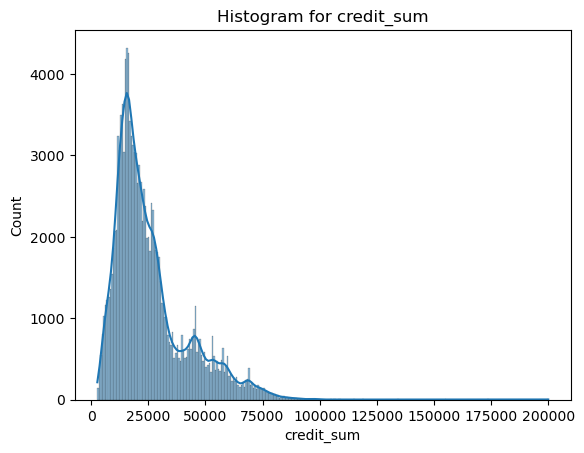

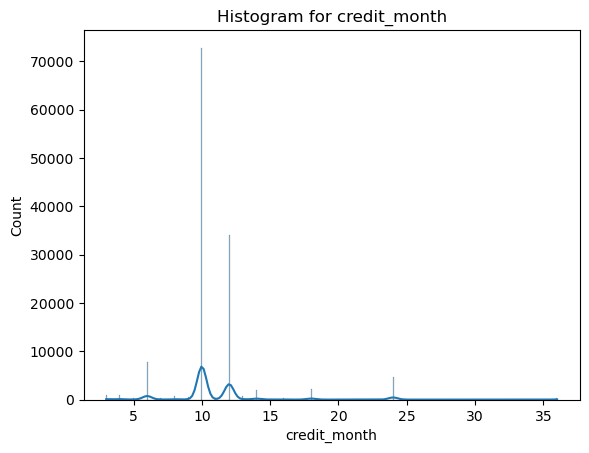

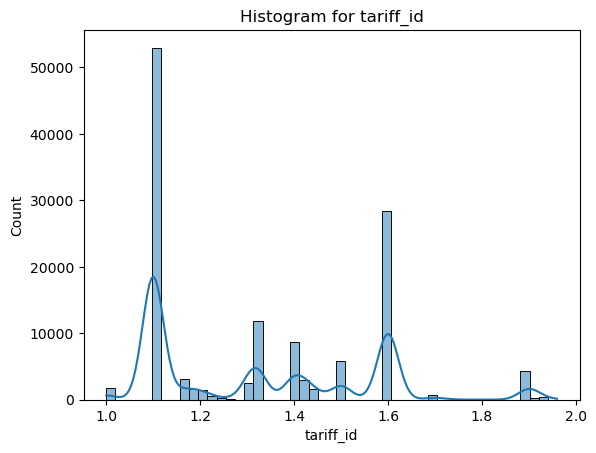

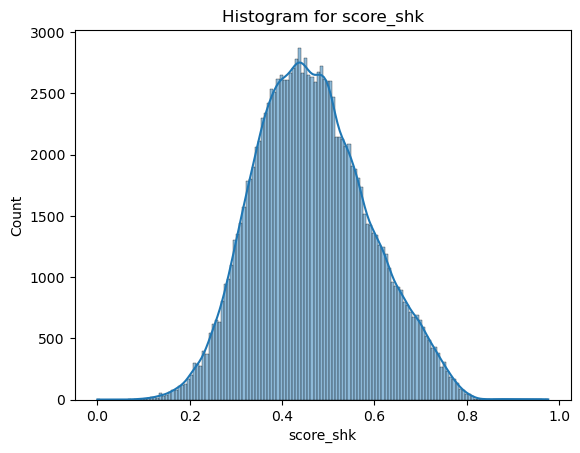

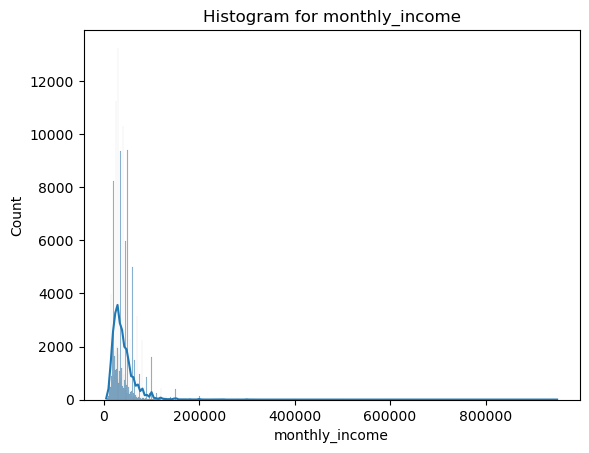

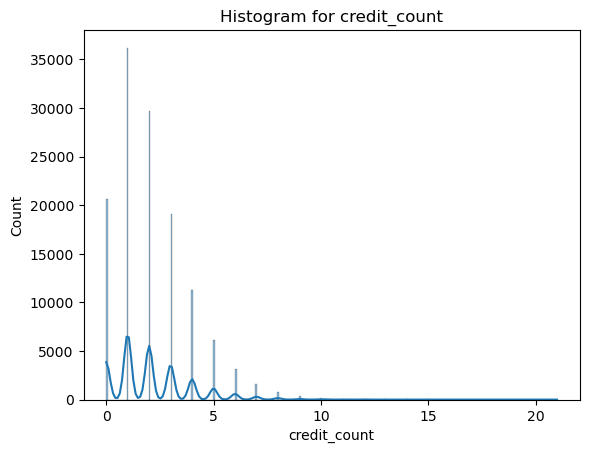

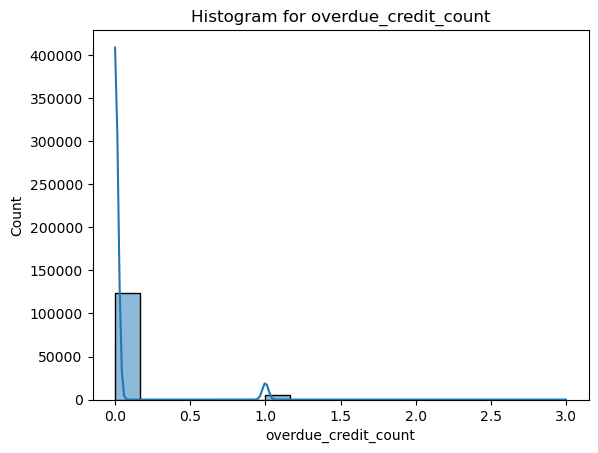

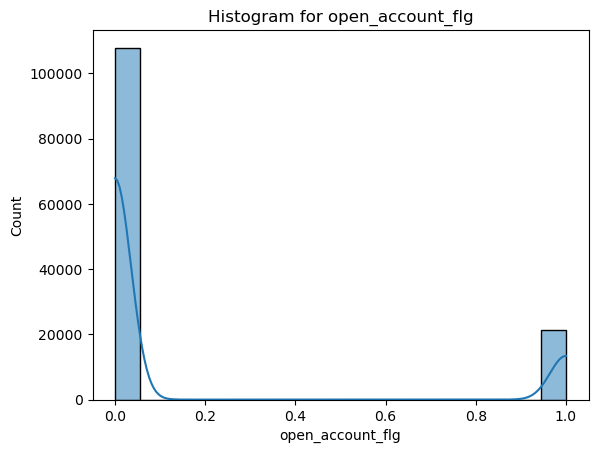

In [130]:
for column_name, column_data in X_train.items():
   sns.histplot(column_data, kde=True)
   plt.title(f'Histogram for {column_name}')
   plt.show()

In [131]:
for column_name, column_data in X_test.items():
    stat, p_value = shapiro(column_data)
    print(f'Shapiro-Wilk test for {column_name}: Statistic={stat}, p-value={p_value}')

Shapiro-Wilk test for age: Statistic=0.9480940699577332, p-value=0.0
Shapiro-Wilk test for credit_sum: Statistic=0.876097559928894, p-value=0.0
Shapiro-Wilk test for credit_month: Statistic=0.6361704468727112, p-value=0.0
Shapiro-Wilk test for tariff_id: Statistic=0.8395116329193115, p-value=0.0
Shapiro-Wilk test for score_shk: Statistic=0.9941803216934204, p-value=3.775283043974123e-33
Shapiro-Wilk test for monthly_income: Statistic=0.7146346569061279, p-value=0.0
Shapiro-Wilk test for credit_count: Statistic=0.8733246326446533, p-value=0.0
Shapiro-Wilk test for overdue_credit_count: Statistic=0.21231114864349365, p-value=0.0
Shapiro-Wilk test for open_account_flg: Statistic=0.4458833932876587, p-value=0.0


/Users/margarita/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


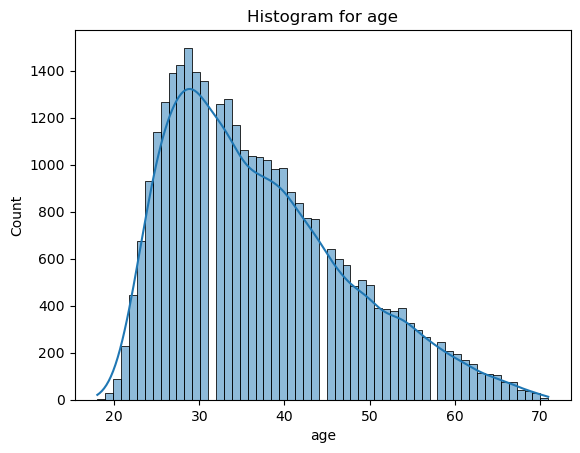

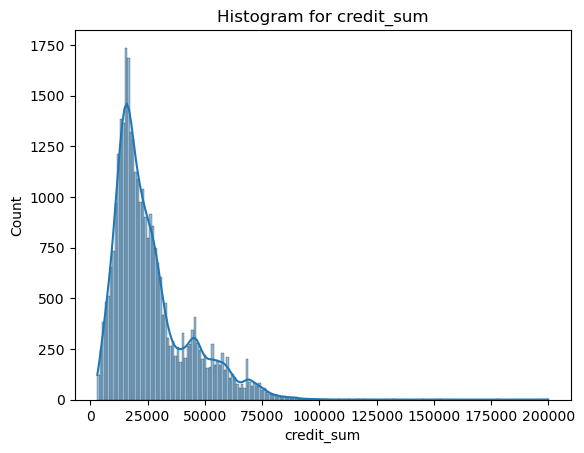

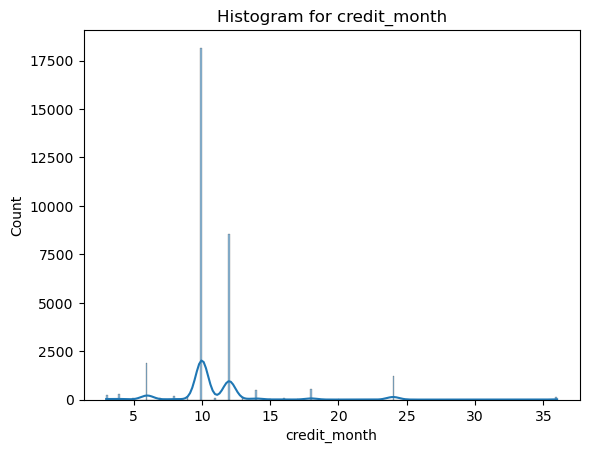

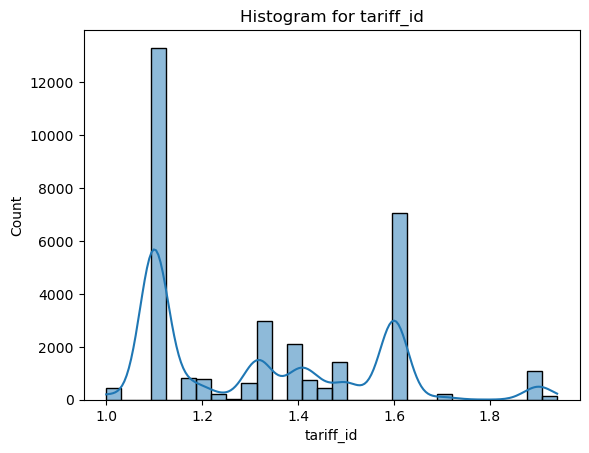

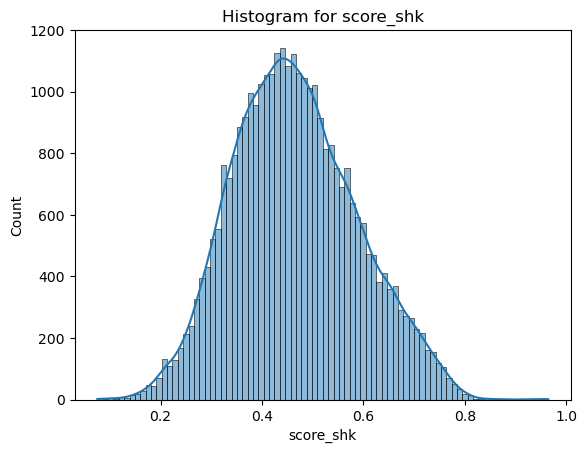

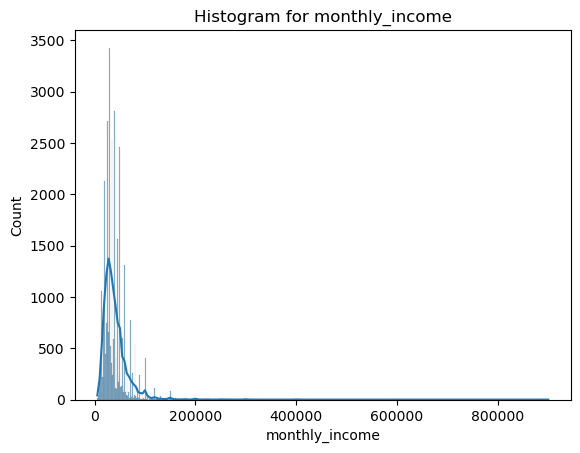

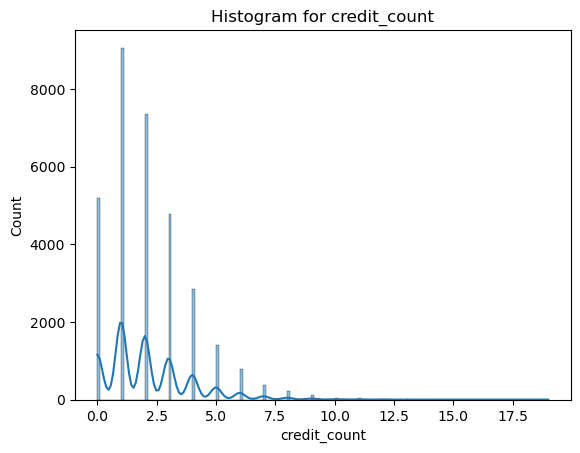

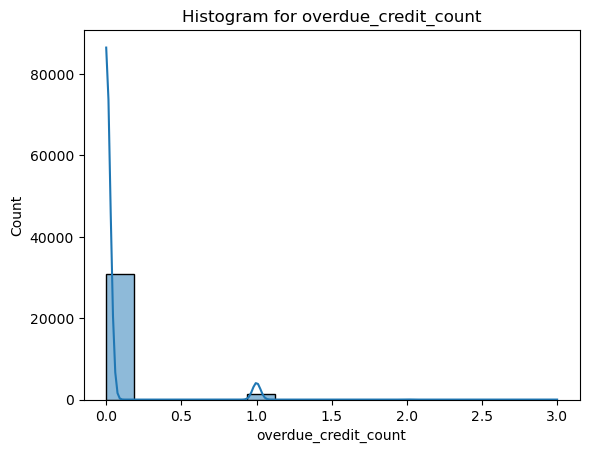

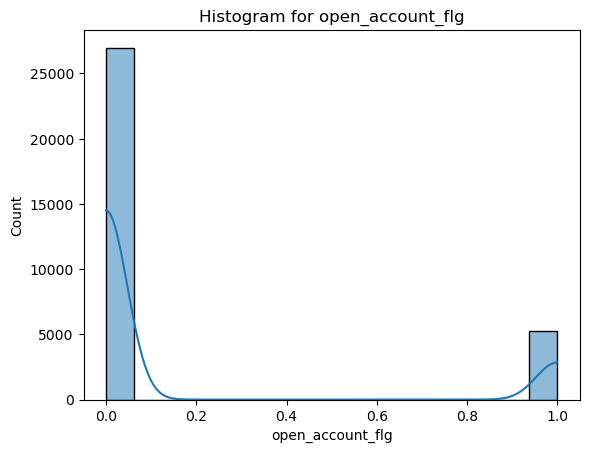

In [126]:
for column_name, column_data in X_test.items():
   sns.histplot(column_data, kde=True)
   plt.title(f'Histogram for {column_name}')
   plt.show()

In [132]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.fit_transform(X_test)

In [133]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)